# Topics in Computer Science - Bitcoin: Programming the Future of Money - ITCS 4010 & 5010 - Spring 2025 - UNC Charlotte

# Homework 6 - Merkle Trees, Testnet, Key Aggregation (60 Points)

Name of Student: Hritika Kucheriya

<br>

<br>

Charlotte ID: 801456028

List of students collaborated with:

# <font color="blue"> Submission instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of all cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version showing the code and the output of all cells, and save it in the same folder that contains the notebook file.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly.
7. Submit **both** your PDF and the notebook file .ipynb on Gradescope.
8. Make sure your your Gradescope submission contains the correct files by downloading it after posting it on Gradescope.

### Make sure you have the output of all cells in the PDF version.

In [1]:
from helper import little_endian_to_int, hash256

### Exercise 1 (10 Points)

Recall that Merkle Trees are used to efficiently and securely organize transaction data in blocks. They facilitate in verifying transactions in a block without having to process each transaction individually, hence decreasing computing and storage needs.

Using the Merkle Tree diagram provided below, write a function `BuildTree` that builds the complete Merkle Tree from a list of leaf node data. The function should hash the data sequentially using the cryptographic hash function `hash256` and return the resulting Merkle Tree as a dictionary and the Merkle root, with all hashes in hexadecimal format.

$\textbf{Figure 1}$
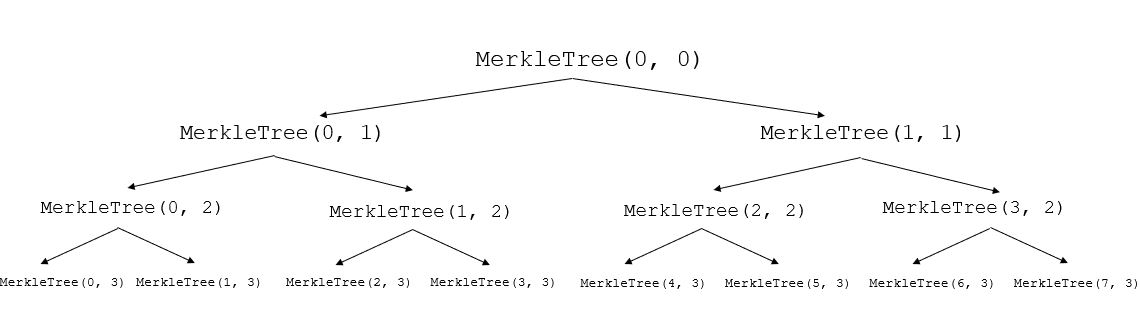

To achieve this, you can use the imported `hash256` function from `helper.py` (which implements two rounds `sha256`).


In [3]:
def BuildTree(data):
    #YOUR CODE HERE

    tree = {}
    
    if not data:
        return tree, None
    
    current_level = []
    
    for i in range(len(data)):
        node_hash = hash256(data[i])
        tree[(i, len(data)-1)] = node_hash  
        current_level.append((i, len(data)-1))  
    

    level = len(data)-1  
    while len(current_level) > 1:
        next_level = []
        
        for i in range(0, len(current_level), 2):
            left_pos = current_level[i]
            
            right_pos = current_level[i+1] if i+1 < len(current_level) else current_level[i]
            
            left_hash = tree[left_pos]
            right_hash = tree[right_pos]
            
            parent_hash = hash256(left_hash + right_hash)
            
            parent_pos = (i//2, level-1)
            tree[parent_pos] = parent_hash
            next_level.append(parent_pos)
        
        current_level = next_level
        level -= 1
    
    return tree, tree[current_level[0]]

**Test the function `BuildTree` by printing the output of its application to the data in list `data`.**
<br> Make sure all Merkle hashes displayed are in hexadecimal format.

In [4]:
data = []
for i in range(8):
    data.append(str(i).encode())

#Construct Merkle Tree using the BuildTree function and data.
#YOUR CODE HERE
tree, root = BuildTree(data)
#Print the Merkle Tree 
#YOUR CODE HERE
print("Merkle Tree:")
for pos in sorted(tree.keys()):
    print(f"Node {pos}: {tree[pos].hex()}")
   
#Print the root hash
#YOUR CODE HERE
print("\nRoot Hash:")
print(root.hex())
#Print the length of the Merkle Tree
#YOUR CODE HERE
print("\nLength of Merkle Tree (number of nodes):")
print(len(tree))

Merkle Tree:
Node (0, 4): 44d445ab227c5b4070144061e86ac8323da03d10f279c0c7ce5bd133cde99f40
Node (0, 5): 85e29a04333d2355bc92093145b17cddfb796497b98e134751713aec4fbf7b69
Node (0, 6): da9bfb26b29784495e4e1c2405b7b0baa5d59ac1e4294f7695ef74dada5c101a
Node (0, 7): 67050eeb5f95abf57449d92629dcf69f80c26247e207ad006a862d1e4e6498ff
Node (1, 5): 5d821994ebfa6ad0a71105ff68c8deb422838e4da7a168c40ff9d7bdfb93ad57
Node (1, 6): 29f5ba595b68dacceb649946777bce5359086befc6a6cc2b3c837a72c7fd361b
Node (1, 7): 9c2e4d8fe97d881430de4e754b4205b9c27ce96715231cffc4337340cb110280
Node (2, 6): 595d9c2231a4a7379788b81863ee583cfeec6103d7d6f2673cbb2f274dd33b5f
Node (2, 7): 0c08173828583fc6ecd6ecdbcca7b6939c49c242ad5107e39deb7b0a5996b903
Node (3, 6): 37f6ef41b6b3acb7a236bb315ed5909f6f033c21766015095f47772813b376a6
Node (3, 7): 80903da4e6bbdf96e8ff6fc3966b0cfd355c7e860bdd1caa8e4722d9230e40ac
Node (4, 7): 5a9eab9148389395eff050ddf00220d722123ca8736c862bf200316389b3f611
Node (5, 7): b2928391f8a477a27749a556b7386f4da4391e

### Exercise 2 (10 Points)

For a Merkle Tree of height 4 as shown in Exercise 1, given the following hashes (in hex format) of the tree,

* MerkleTree(0, 0) = 58947e812d9bfe2d19cf074798c82c4a67425ddbbd06f964df60eab06e5528f1
* MerkleTree(4, 3) = 88f78c1046639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a
* MerkleTree(3, 2) = 12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221
* MerkleTree(0, 1) = c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9

**a)** You want to determine whether the _sixth_ leaf of the Merkle tree contains a specific data value. 
<br>
Which of the data above is the corresponding
- Merkle root
and 
- Merkle proof
?

[Add your explanation here]


The sixth leaf would be at position MerkleTree(5, 3) in the tree (0-based indexing, level 3)
To verify this leaf, we need:


The Merkle root (MerkleTree(0, 0))


The nodes that form the proof path from the sixth leaf to the root
From the given hashes:


MerkleTree(0, 0) = 58947e812d9bfe2d19cf074798c82c4a67425dbbbd06f964df60eab06e5528f1 (Root)


MerkleTree(4, 3) = 88f78c104639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a (A sibling hash needed)


MerkleTree(3, 2) = 12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221 (A sibling hash needed)


MerkleTree(0, 1) = c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9 (A sibling hash needed)



Merkle root: MerkleTree(0, 0) = 58947e812d9bfe2d19cf074798c82c4a67425dbbbd06f964df60eab06e5528f1


Merkle proof (the sibling hashes needed to verify the sixth leaf):


MerkleTree(4, 3) - This is the sibling hash to combine with leaf 5


MerkleTree(3, 2) - This is the sibling hash needed at the next level


MerkleTree(0, 1) - This is the sibling hash needed at the level below the root


These hashes together form the Merkle proof that would allow verification of the sixth leaf's membership in the tree.



To verify the sixth leaf of the Merkle tree, we need:


Merkle root: MerkleTree(0, 0) = 

58947e812d9bfe2d19cf074798c82c4a67425dbbbd06f964df60eab06e5528f1


Merkle proof:


MerkleTree(4, 3) = 88f78c104639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a


MerkleTree(3, 2) = 12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221


MerkleTree(0, 1) = c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9


These hashes form the minimum set of information needed to verify the sixth leaf's inclusion in the Merkle tree. By combining these hashes in the correct order following the tree structure, one can reconstruct the path to the root and verify the leaf's authenticity.

**b)** Write a Python function that determines whether or not the _sixth_ leaf of the Merkle tree of height $4$ represented by the Merkle root `root`, Merkle proof `proof` contains the leaf data `leafdata`.

In [5]:
#YOUR CODE HERE

def verify_sixth_leaf(root, proof, leafdata):
   
    current_hash = hash256(leafdata)
    
    index = 5
    
    for sibling_hash in proof:
  
        sibling_bytes = bytes.fromhex(sibling_hash)
        
       
        if index % 2 == 1:
            current_hash = hash256(sibling_bytes + current_hash)
        else:
            current_hash = hash256(current_hash + sibling_bytes)
            
    
        index = index // 2
    

    return current_hash.hex() == root

**c)** Test your code from **b)** by using it whether the sixth leaf of the Merkle tree is the string `'Bitcoin'`, and print the result.

In [12]:

root = "58947e812d9bfe2d19cf074798c82c4a67425ddbbd06f964df60eab06e5528f1"

proof = [
    "88f78c1046639b63b4ed955562e77f7f629cbaf4b1d4be2e2ced0b018d1e975a",  
    "12b0c2c2b54b1a4419cc7cf8e101b11e0c7a96543f4587dcadfd087485a94221",  
    "c7cd42509889acd266b6f7f0b2b04fb7e734189bcc70f6d5f633622c97a658b9"   
]

leafdata = 'Bitcoin'.encode()  
result = verify_sixth_leaf(root, proof, leafdata)

print(f"Is 'Bitcoin' the sixth leaf? {result}")

Is 'Bitcoin' the sixth leaf? True


### Exercise 3 (10 Points)

Using the `PrivateKey` class from `ecc.py`, generate a private key with a secret of your choice. 

Keep your secret and private key confidential; do not share them with anyone.

**Note:** There is no need to print the private key or reveal the secret. You can leave the secret field blank in your submission.

In [13]:
from ecc import PrivateKey

In [14]:
#YOUR CODE HERE

secret = 1234567890  
private_key = PrivateKey(secret)

Generate a $\textbf{P2PKH testnet address}$ from your private key and print the resulting P2PKH testnet address.

Hint: Use `S256Point` class in `ecc.py` to create address from your private key

In [15]:
#YOUR CODE HERE

testnet_address = private_key.point.address(testnet=True)
print(f"P2PKH Testnet Address: {testnet_address}")

P2PKH Testnet Address: mmzyqYxQTao1hrsq6hFEquBbPhhg1qzmxy


### Exercise 4 (10 Points)

Once you have an address, obtain at least $0.001 tBTC$ ("Testnet Bitcoin") from a the testnet4 faucet to be sent to your P2PKH testnet address from Exercise 3.
Obtains to obtain these coins are:
- [Testnet4.dev](https://faucet.testnet4.dev/)
- [Coinfacuet](https://coinfaucet.eu/en/btc-testnet4/)
- [mempool.space](https://mempool.space/testnet4) **Note:** This option requires signing up for an account on mempool.space to access the faucet. You might need to create a GitHub account using with your @charlotte.edu address to do this.

Provide a screenshot from mempool.space displaying the Inputs and Outputs of your faucet transaction.

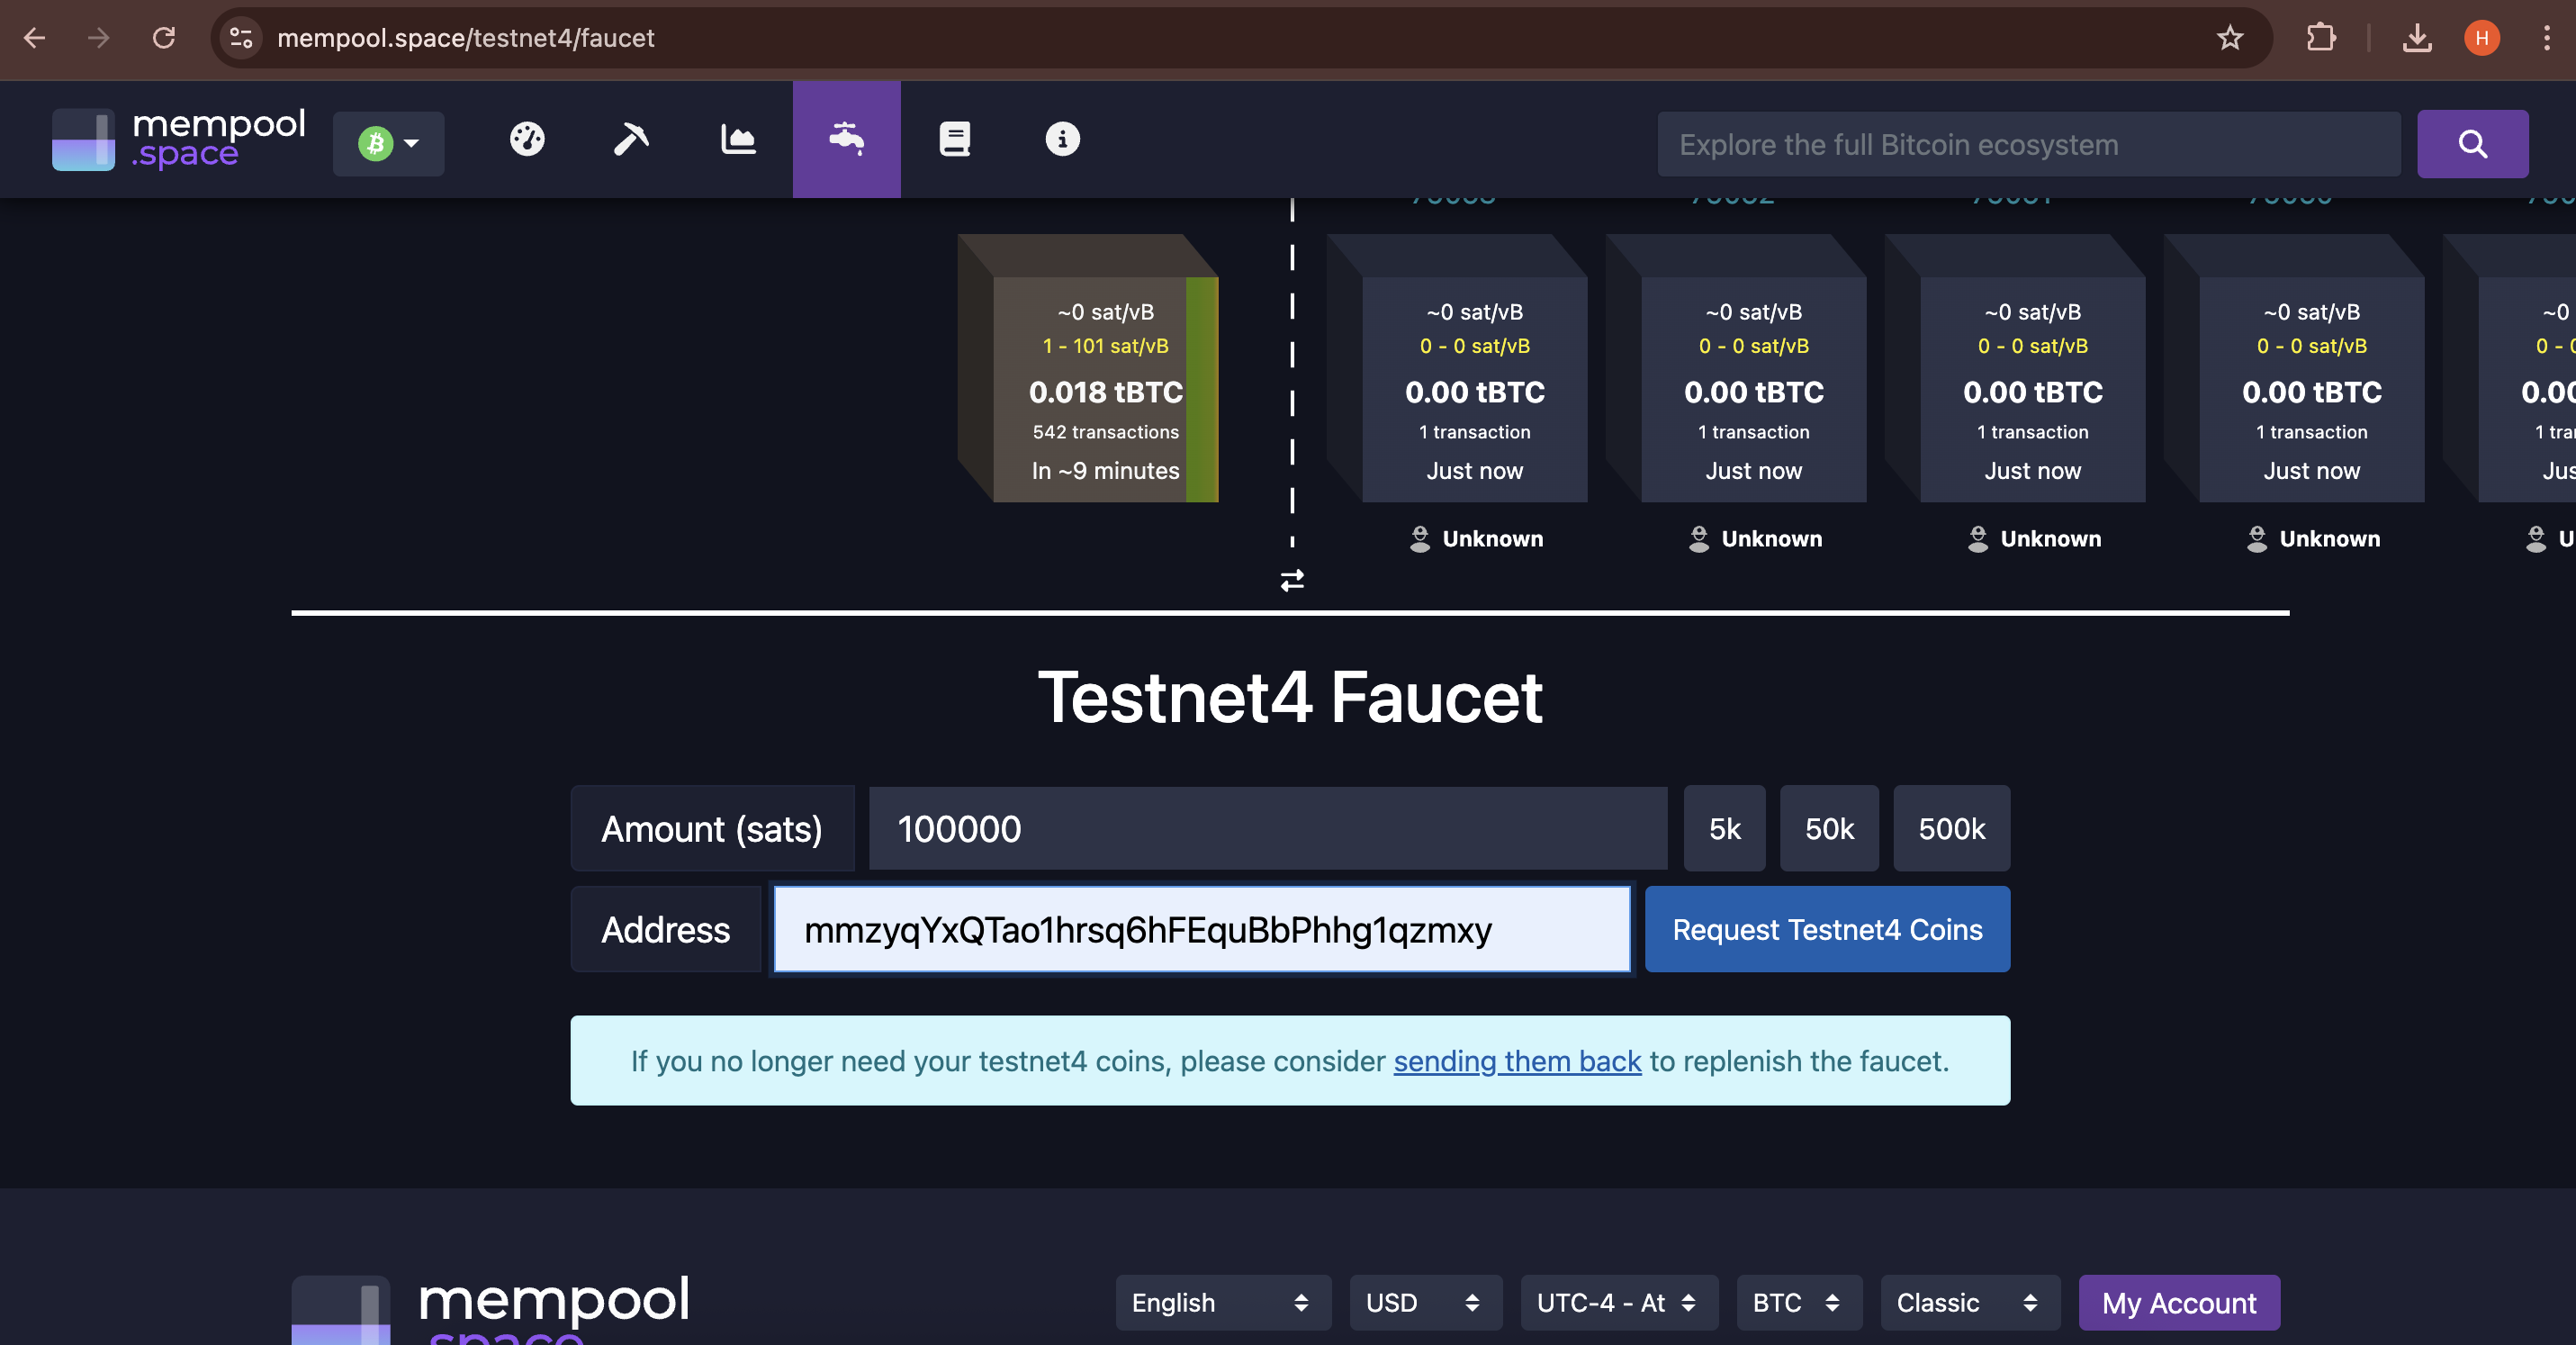

In [18]:
from IPython.display import Image
Image("Screenshot 2025-04-23 at 5.19.20 PM.png")


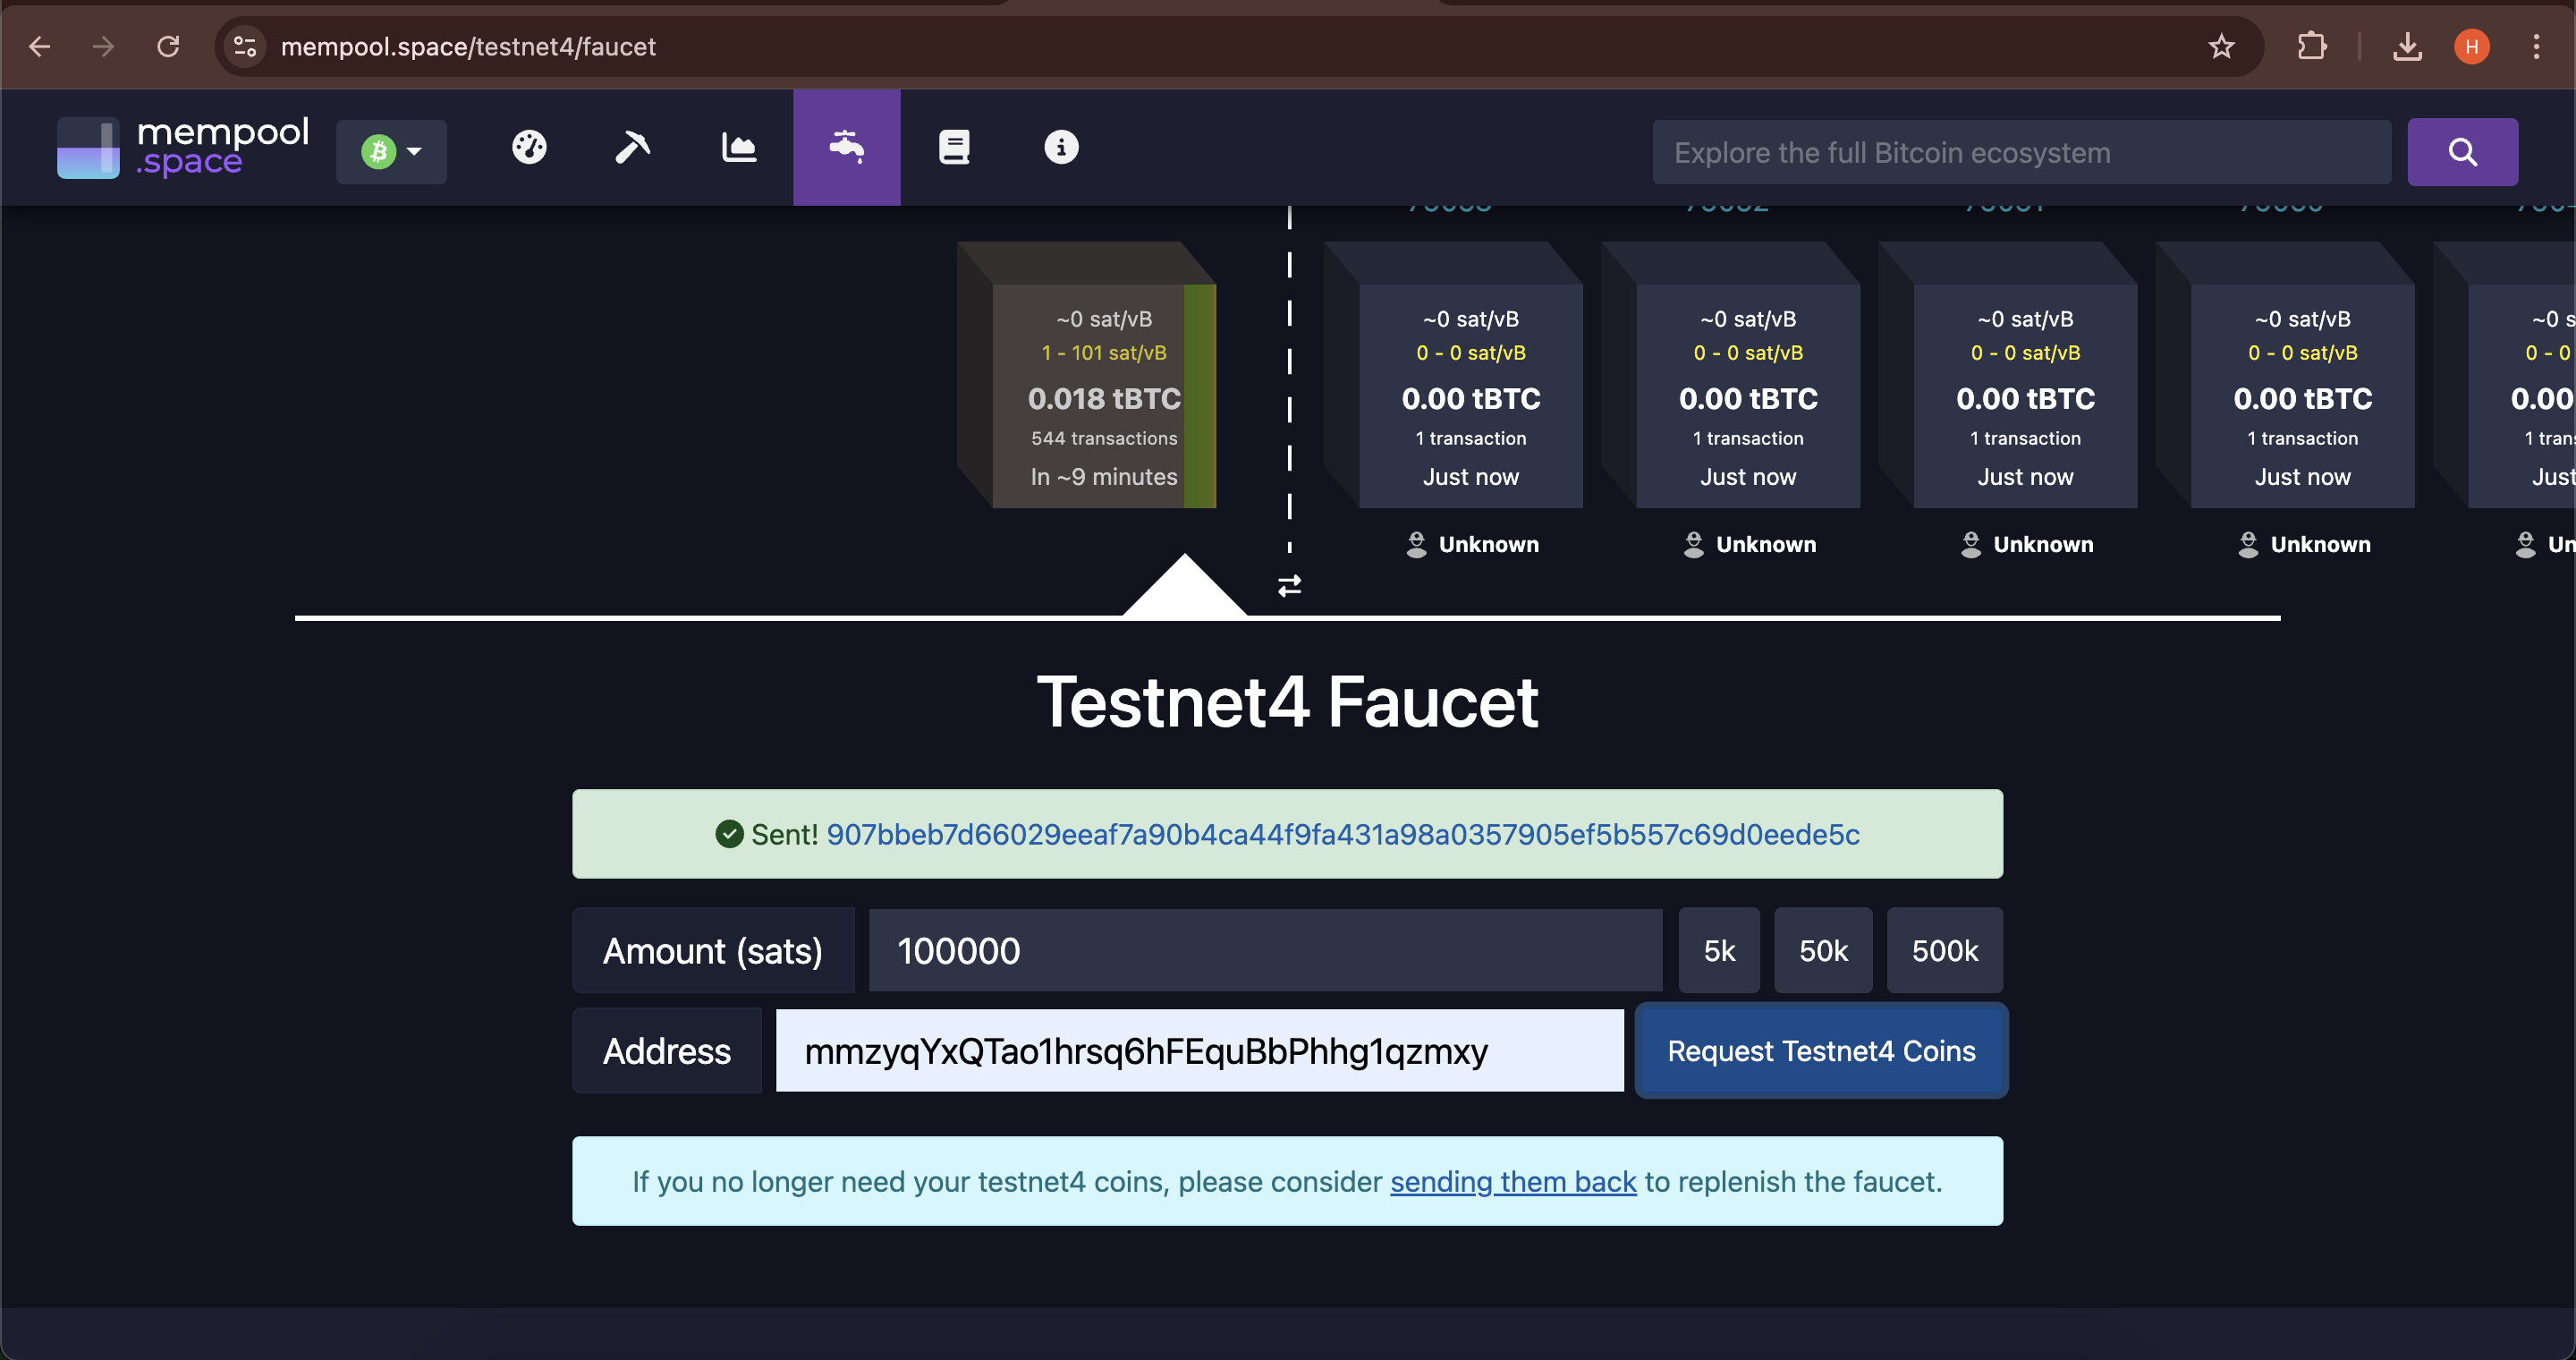

In [19]:
from IPython.display import Image
Image("Screenshot 2025-04-23 at 5.19.33 PM.png")

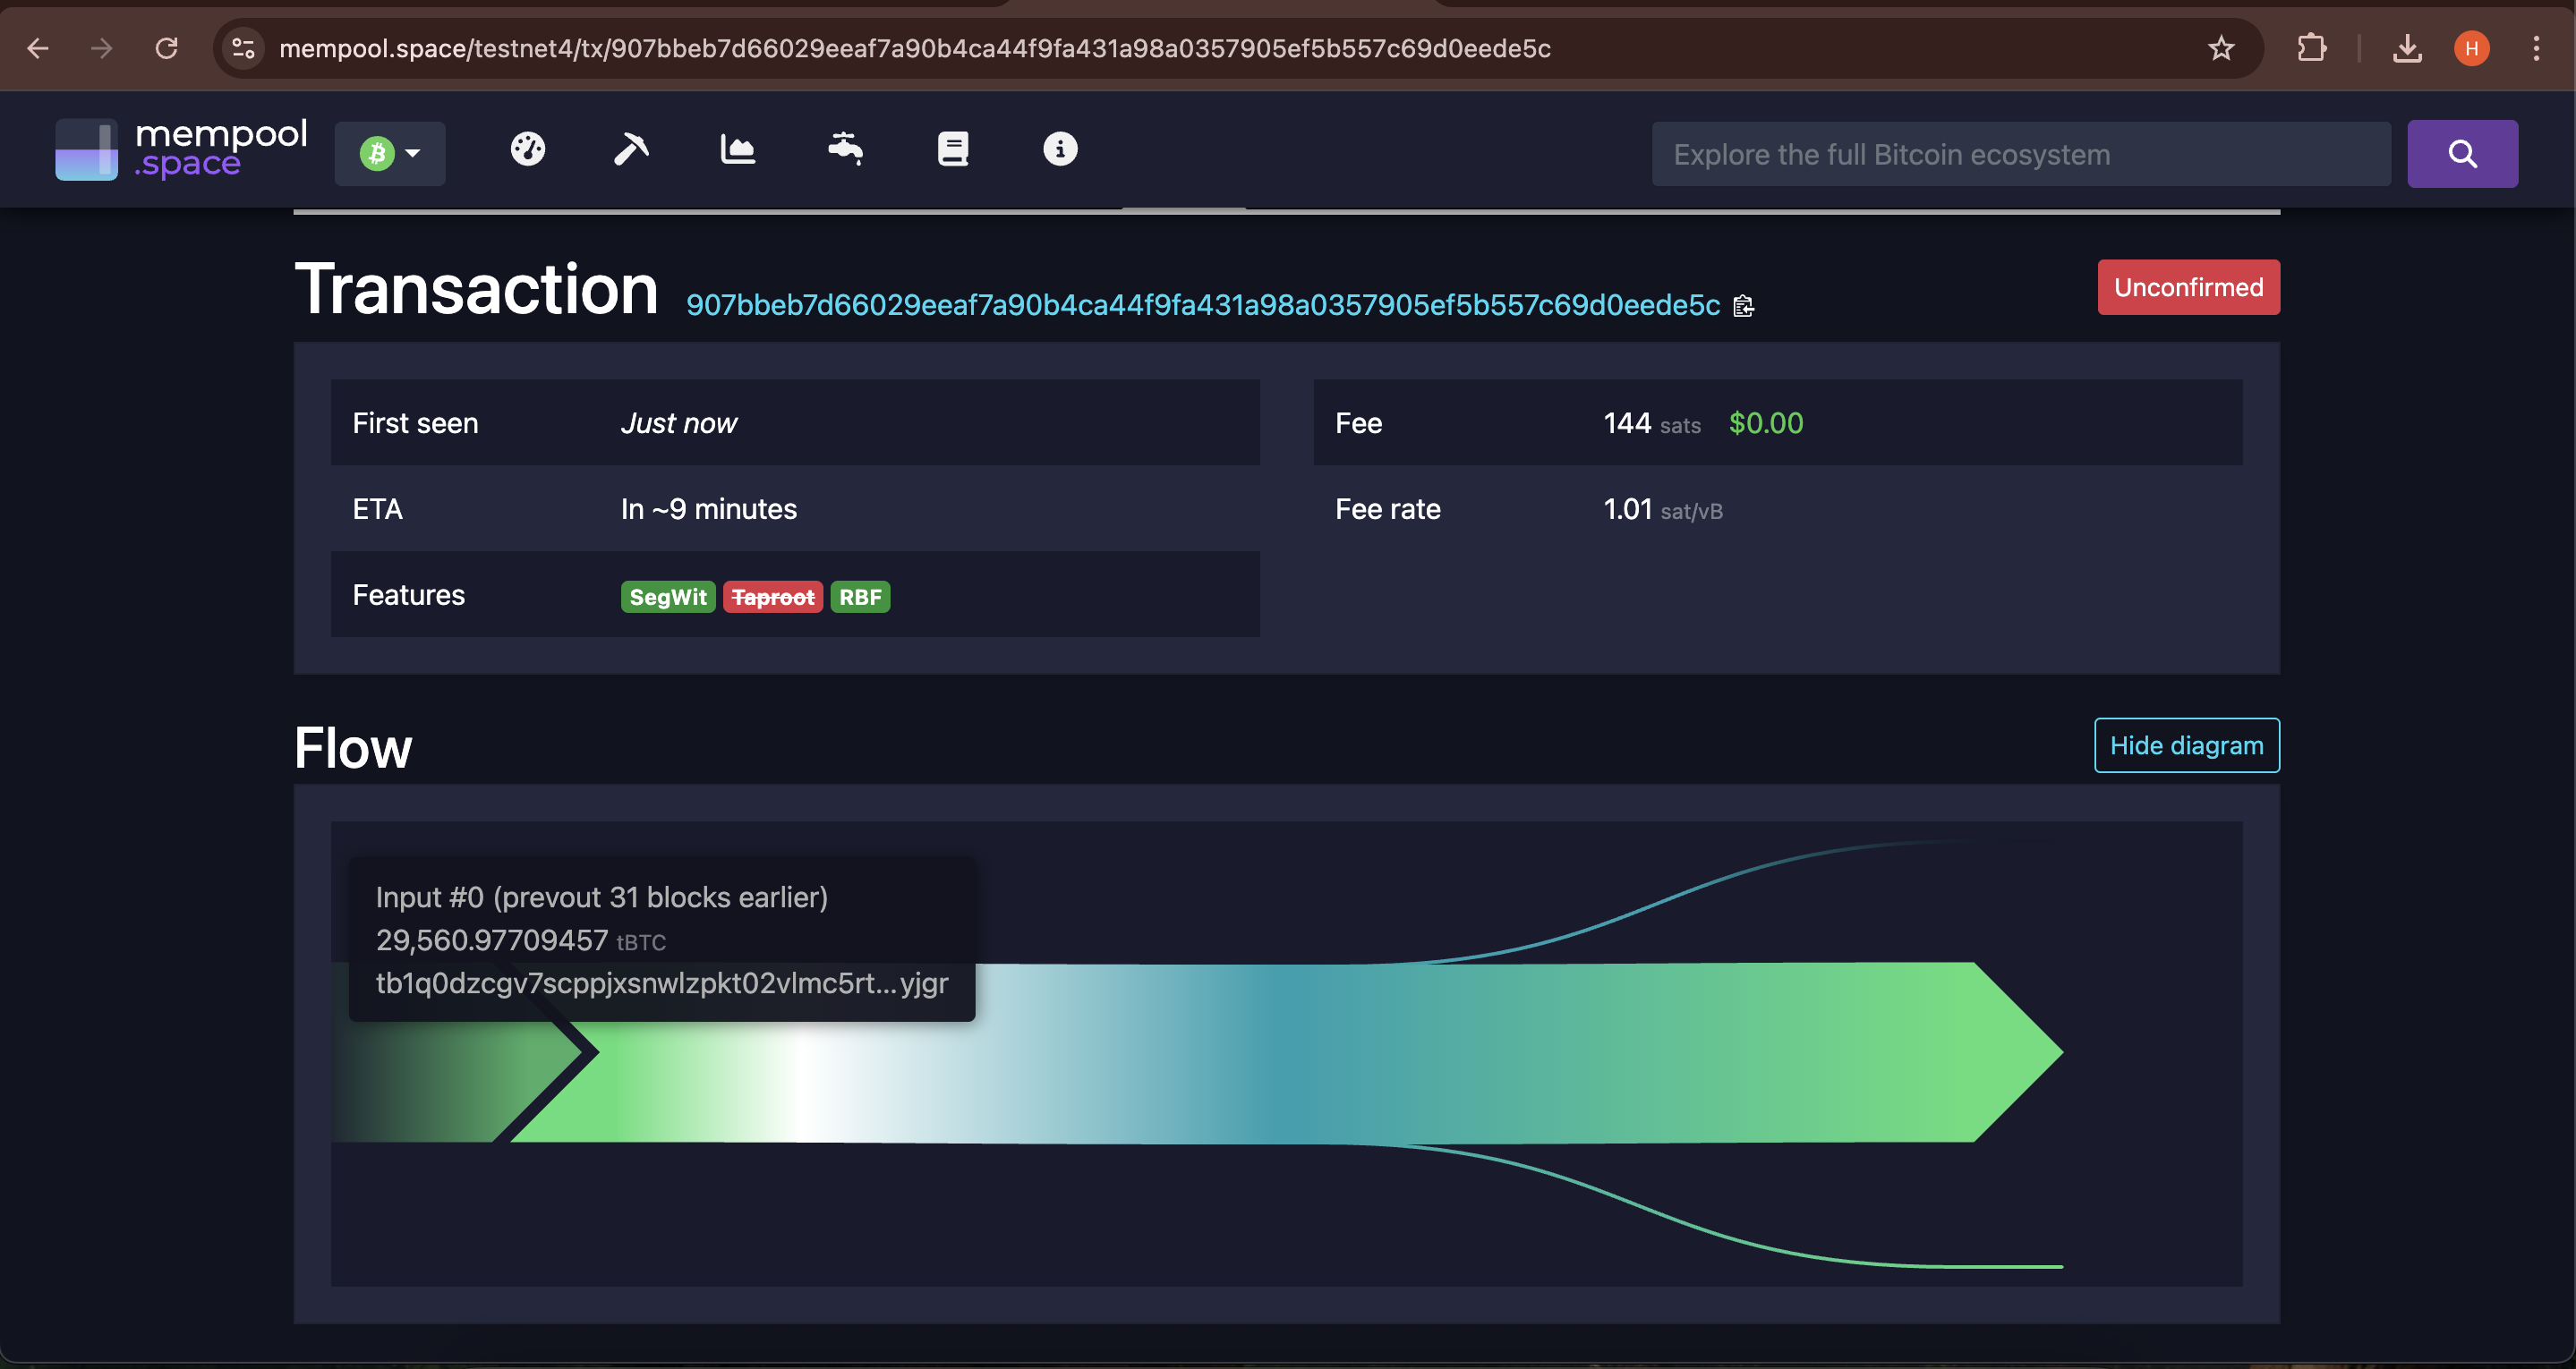

In [20]:
from IPython.display import Image
Image("Screenshot 2025-04-23 at 5.19.46 PM.png")

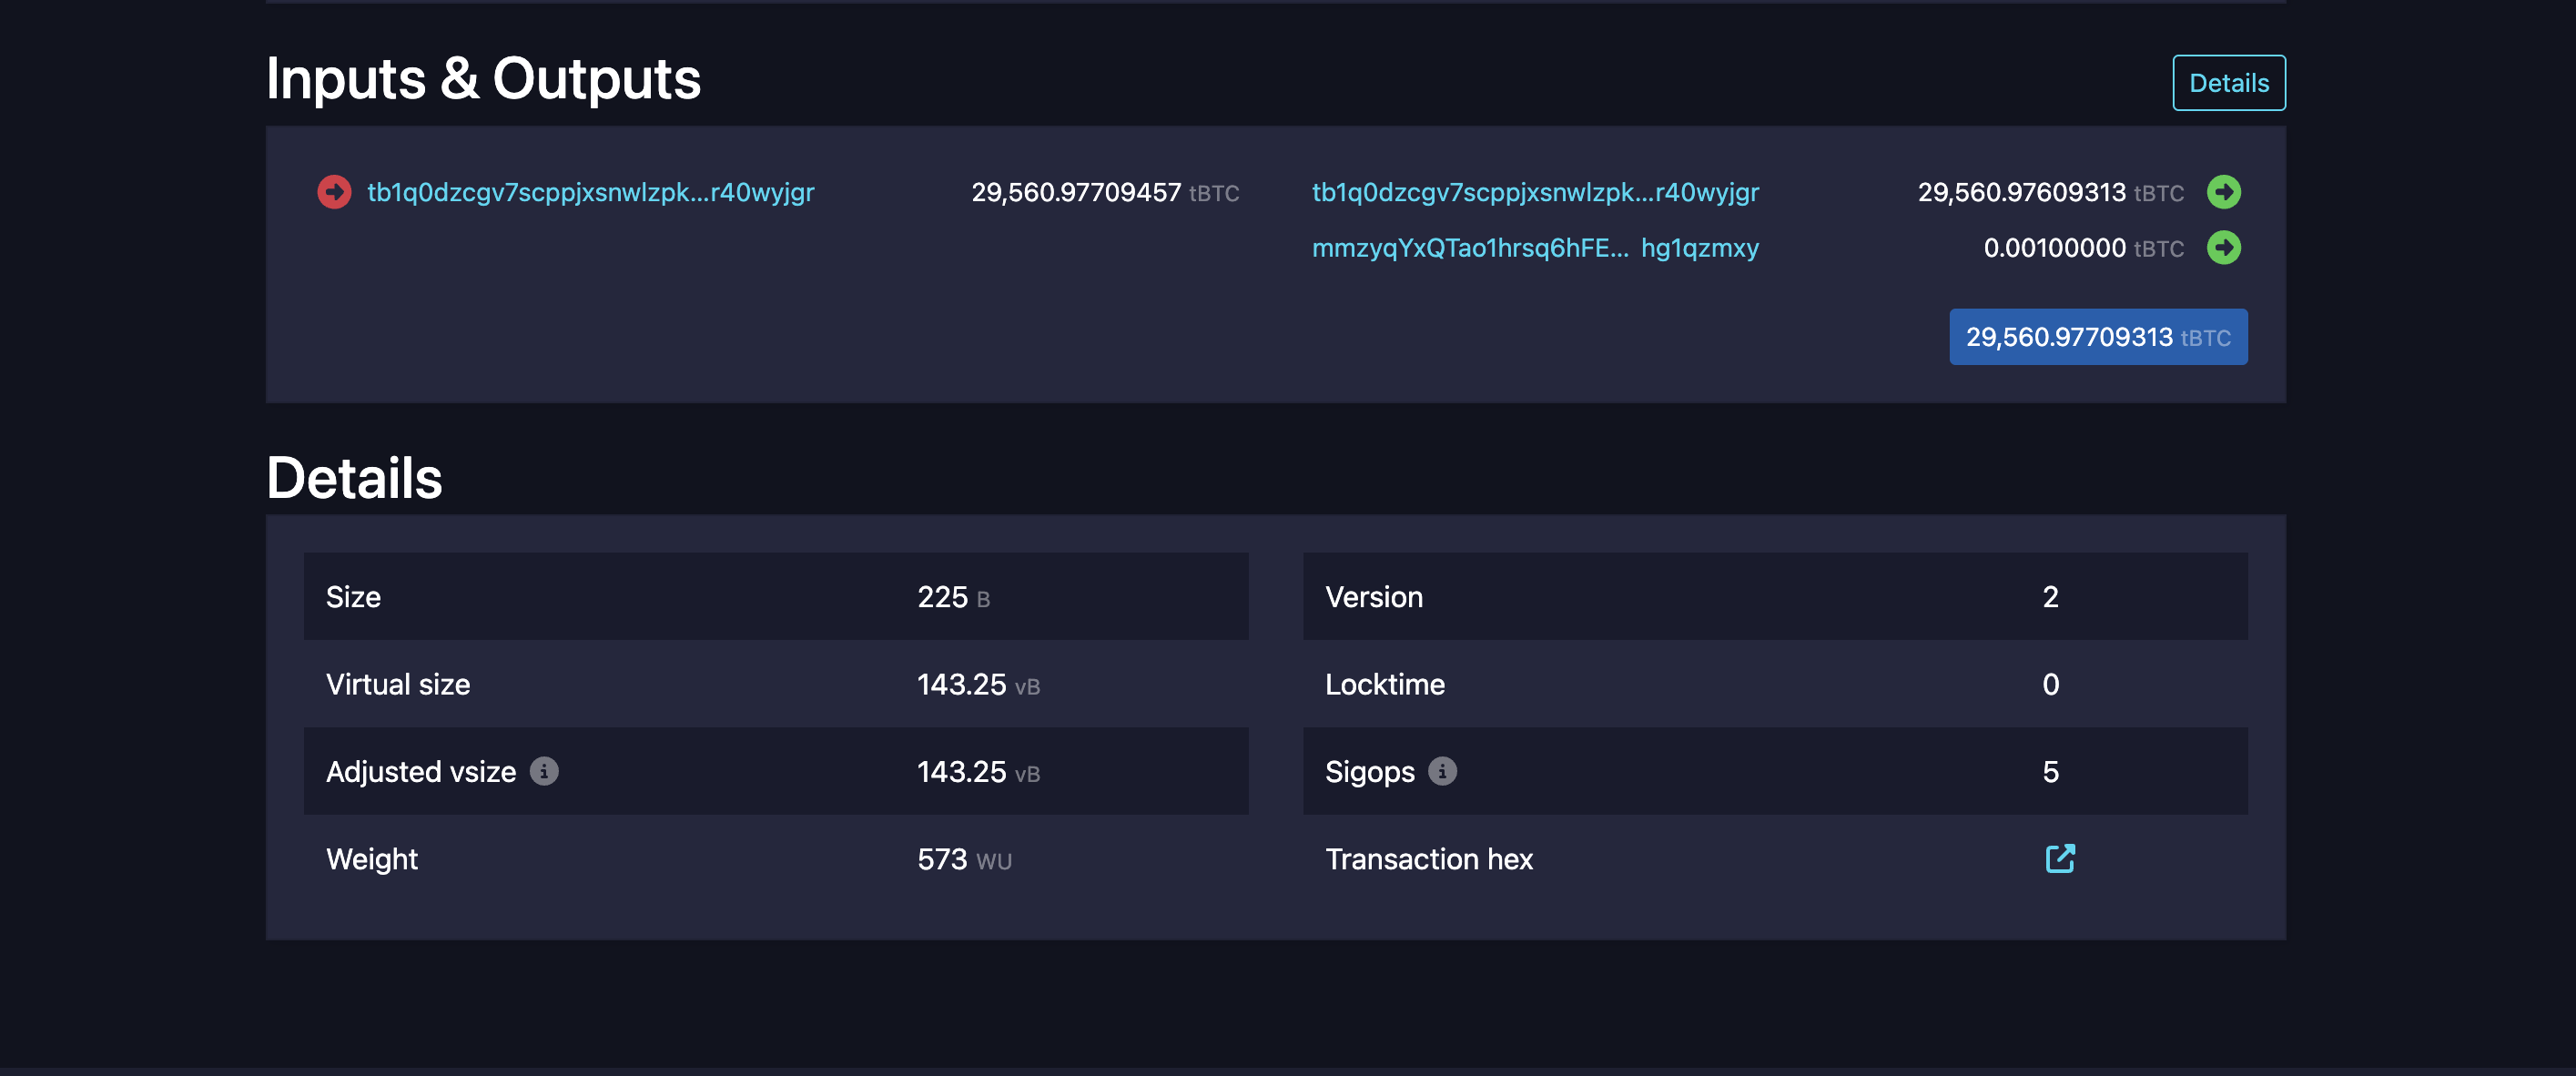

In [21]:
from IPython.display import Image
Image("Screenshot 2025-04-23 at 5.19.52 PM.png")

#YOUR SCREENSHOT HERE


### Exercise 5 (20 Points): Key Aggregation through Schnorr Signatures.

We learnt in class about the [MuSig](https://bitcoinops.org/en/topics/musig/) key aggregation protocol to implement scriptless $k$-of-$k$ multisignatures.

To simplify the protocol, we consider the following alternative protocol for implemented key aggregation for a $3$-of-$3$ multisignature involving Alice, Bob and Charlie, which also builds on the Schnorr signature scheme.

The key generation works as follows:

1. Alice, Bob and Charlie are in the possession of private keys $e_A$, $e_B$ and $e_C$ that they keep secret for themselves, respectively.
2. Alice derives public key $P_A = e_A G$, Bob derives public key $P_B = e_B G$ and Charlie derives public key $P_C =e_C G$.
3. Alice, Bob and Charlie exchange the public keys $P_A$, $P_B$ and $P_C$ with each other. 
4. The aggregrated public key is computed as $P:= P_A + P_B + P_C$ (which can be done by each participant).

Subsequently, the nonce generation and data exchange works as follows:

1. Alice, Bob and Charlie randomly generate private nonces $k_A$, $k_B$ and $k_C$, respectively.
2. Alice derives public nonce $R_A = k_A G$, Bob derives public nonce $R_B = k_B G$ and Charlie derives public nonce $R_C =k_C G$.
3. Alice, Bob and Charlie exchange the public keys $P_A$, $P_B$ and $P_C$ with each other. 
4. The aggregrated public nonce is computed as $R:= R_A + R_B + R_C$  (which can be done by each participant).

The generation of the aggregated signature works as follows:
1. Alice computes partial signature $s_A = k_A + \operatorname{hash}(R || P || m) e_A$, Bob computes partial signature $s_B = k_B + \operatorname{hash}(R || P || m) e_B$, and Charlie computes partial signature $s_C = k_C + \operatorname{hash}(R || P || m) e_C$.
2. Participants share the values of $s_A$, $s_B$ and $s_C$ with each other.
3. The aggregated signature is $s = s_A + s_B+ s_C$. 

($m$ is the message to be signed).

After following these steps, $(s,R)$ is the valid signature output that will return "True" in Schnorr's verification function corresponding to aggregated public key $P$ and message $m$.

**How can Charlie create a valid aggregated signature for the aggregated public key without the access to Alice's or Bob's partial signature $s_A$ and $s_B$, by acting dishonest? <br> <br>
Describe how this attack works and explain why it works.**


[Add your description and explanation here]


Charlie can create a valid aggregated signature by exploiting the linearity of the protocol. Here's how the attack works:

1. During the key generation phase:
   - Charlie knows his own private key eC
   - Charlie knows all public keys (PA, PB, PC) since they were exchanged
   - The aggregated public key is P = PA + PB + PC

2. During the nonce generation phase:
   - Instead of generating a single nonce kC, Charlie generates three nonces: kC1, kC2, and kC3
   - Charlie sets:
     * RC1 = kC1*G (pretending this is RA from Alice)
     * RC2 = kC2*G (pretending this is RB from Bob)
     * RC3 = kC3*G (his actual nonce)
   - Charlie announces these as if they were from the respective parties
   - The aggregated nonce becomes R = RC1 + RC2 + RC3 (which Charlie fully controls)

3. For the signature generation:
   - Charlie can compute the entire signature s = sA + sB + sC by:
     * sC1 = kC1 + hash(R||P||m)*0 (fake Alice's part)
     * sC2 = kC2 + hash(R||P||m)*0 (fake Bob's part)
     * sC3 = kC3 + hash(R||P||m)*eC (his legitimate part)
   - The total signature s = sC1 + sC2 + sC3

4. Why this works:
   - The verification equation R = sG - hash(R||P||m)P will hold because:
     * Charlie controls all components of R through his chosen nonces
     * The signature s matches with R because Charlie constructed it that way
     * Charlie's real private key eC is used correctly in the equation
   - Since Charlie controlled the entire nonce generation process, he can make the math work out without needing Alice's or Bob's actual signatures

This attack works because:
1. The protocol doesn't require proof that each party actually generated their own nonces
2. There's no verification that the partial signatures actually came from the respective parties
3. The linearity of the Schnorr signature scheme allows Charlie to manipulate the mathematics to create a valid signature using only his own private key


In [26]:
jupyter nbconvert --to pdf Homework6.ipynb

SyntaxError: invalid syntax (1084601264.py, line 1)